# I. Labeling/Creating Dependent Variable

The data collected from SportsReferences Database('NCAA_players_career_data') consisted of the players on-court statistics. Since the goal of this supervised ML project is to predict whether or not a player gets drafted we must label our data. Using another dataset downloaded from Kaggle('NBA_Full_Draft_1947-2018.csv') I was able to match the names of said player to determine if he was drafted. To combat the chance that 2 or more players had the same name I also looked into the year they enter the draft. To my knowledge and research no 2 players had the same name that were drafted in the same year

In [1]:
# Import libraries
from sportsreference.ncaab.teams import Teams
from sportsreference.ncaab.roster import Player
from sportsreference.ncaab.roster import Roster

import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
# Import data
df = pd.read_csv('NCAA_players_career_data')

# Print head of df
df.head()

,player_id,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,...,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,year
0,ryan-teets-1,10.2,12.0,0.4,1.0,NaN,NaN,NaN,NaN,26.0,...,26.5,16.0,18.0,0.667,12.0,13.4,200.0,0.6,0.091,"('2006-07',)"
1,brendan-leonard-1,27.3,3.0,0.0,0.0,6.9,NaN,-0.7,9.7,2.0,...,18.3,2.0,2.0,0.500,1.0,23.4,235.0,0.1,0.133,"('2016-17',)"
2,anwar-johnson-1,18.4,162.0,0.5,12.0,NaN,NaN,NaN,NaN,175.0,...,17.5,133.0,427.0,0.471,201.0,20.7,200.0,3.9,0.070,"('2008-09',)"
3,eric-kenzik-1,17.6,32.0,0.9,5.0,NaN,NaN,NaN,NaN,69.0,...,20.0,32.0,79.0,0.506,40.0,21.0,220.0,1.2,0.104,"('2007-08',)"
4,keegan-culp-1,0.0,0.0,0.0,0.0,-23.6,NaN,-7.3,17.0,1.0,...,0.0,0.0,0.0,NaN,0.0,7.3,186.0,0.0,-0.027,"('2016-17',)"


In [3]:
# Print shape of df
df.shape

# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31557 entries, 0 to 31556
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_id                        31557 non-null  object 
 1   assist_percentage                25288 non-null  float64
 2   assists                          31535 non-null  float64
 3   block_percentage                 25288 non-null  float64
 4   blocks                           31534 non-null  float64
 5   box_plus_minus                   13993 non-null  float64
 6   conference                       0 non-null      float64
 7   defensive_box_plus_minus         13993 non-null  float64
 8   defensive_rebound_percentage     15550 non-null  float64
 9   defensive_rebounds               29766 non-null  float64
 10  defensive_win_shares             31546 non-null  float64
 11  effective_field_goal_percentage  29661 non-null  float64
 12  field_goal_attempt

In [4]:
# breif describe of some columns 
df[['assists','blocks','field_goals','free_throw_percentage','games_played','weight','minutes_played','points']].describe()

,assists,blocks,field_goals,free_throw_percentage,games_played,weight,minutes_played,points
count,31535.000000,31534.000000,31535.000000,28795.000000,31535.000000,29487.000000,30302.000000,31535.000000
mean,88.007230,22.350923,161.916505,0.643507,65.776439,204.193543,1297.314666,460.734295
std,115.893027,38.470576,172.446032,0.168216,42.849828,26.394167,1194.328362,495.033879
min,0.000000,0.000000,0.000000,0.000000,1.000000,101.000000,0.000000,0.000000
25%,6.000000,1.000000,13.000000,0.569000,26.000000,185.000000,183.000000,38.000000
50%,43.000000,8.000000,103.000000,0.667000,62.000000,200.000000,997.500000,288.000000
75%,124.000000,27.000000,264.000000,0.750000,108.000000,220.000000,2152.000000,750.000000
max,1030.000000,564.000000,1141.000000,1.000000,157.000000,370.000000,5041.000000,3225.000000


## Create Target Variable

In [5]:
#import NBA draft data
target_df = pd.read_csv('Data/NBA_Full_Draft_1947-2018.csv',index_col=0)
#subseting to Nba draft starting 1980
target_df = target_df.loc[np.logical_and(target_df.Year >1979,target_df.Year <2018)]
# Reformat players names to match names in df
target_df['Player'] = target_df['Player'].map(lambda x: x.replace('-',' ').replace("'",'').lower())
# New variable draft_id (fname lnameYeardrafted)
target_df['drafted_id']= target_df['Player'] + target_df['Year'].astype(str)
#list of drafted_id
drafted_id = target_df['drafted_id'].tolist()
# Print head of target_df
target_df.head()

,Team,Player,College,Play_Yrs,Games,Year,Pick,drafted_id
4546,GSW,joe barry carroll,Purdue University,10.0,705.0,1980,1,joe barry carroll1980
4547,UTA,darrell griffith,University of Louisville,10.0,765.0,1980,2,darrell griffith1980
4548,BOS,kevin mchale,University of Minnesota,13.0,971.0,1980,3,kevin mchale1980
4549,CHI,kelvin ransey,Ohio State University,6.0,474.0,1980,4,kelvin ransey1980
4550,DEN,james ray,Jacksonville University,3.0,103.0,1980,5,james ray1980


The sportreference data doesn't have a column for player names, only player_id, so I have to create a column for names derived from player_id

Player_id consist of '{First}-{Last}-{#}'

\# - interates if another player had same name

In [6]:
# Create new column with players name

df['name']=df['player_id'].map(lambda x:x.replace('-1','').replace('-2','').replace('-3','').replace('-4','').replace('-5','').replace('-',' ').lower())

In [7]:
# Change year into single int (e.g 2014-15  to   2015)
df['year']=df['year'].map( lambda x: 1900 + int(x[7:9]) if int(x[7:9]) > 20 else int(x[7:9]) + 2000)

In [8]:
# Create drafted_id ('first+last+year_drafted')
df['drafted_id']= df['name'] + df['year'].astype(str)
df

,player_id,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,...,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,year,name,drafted_id
0,ryan-teets-1,10.2,12.0,0.4,1.0,NaN,NaN,NaN,NaN,26.0,...,18.0,0.667,12.0,13.4,200.0,0.6,0.091,2007,ryan teets,ryan teets2007
1,brendan-leonard-1,27.3,3.0,0.0,0.0,6.9,NaN,-0.7,9.7,2.0,...,2.0,0.500,1.0,23.4,235.0,0.1,0.133,2017,brendan leonard,brendan leonard2017
2,anwar-johnson-1,18.4,162.0,0.5,12.0,NaN,NaN,NaN,NaN,175.0,...,427.0,0.471,201.0,20.7,200.0,3.9,0.070,2009,anwar johnson,anwar johnson2009
3,eric-kenzik-1,17.6,32.0,0.9,5.0,NaN,NaN,NaN,NaN,69.0,...,79.0,0.506,40.0,21.0,220.0,1.2,0.104,2008,eric kenzik,eric kenzik2008
4,keegan-culp-1,0.0,0.0,0.0,0.0,-23.6,NaN,-7.3,17.0,1.0,...,0.0,NaN,0.0,7.3,186.0,0.0,-0.027,2017,keegan culp,keegan culp2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31552,chris-booth-1,2.6,5.0,0.0,0.0,NaN,NaN,NaN,NaN,35.0,...,32.0,0.375,12.0,8.7,245.0,0.4,0.048,2007,chris booth,chris booth2007
31553,stefan-rosic-1,5.6,3.0,2.2,2.0,-8.6,NaN,-2.3,9.6,8.0,...,14.0,0.500,7.0,19.5,200.0,0.0,-0.019,2017,stefan rosic,stefan rosic2017
31554,dan-boudler-1,5.8,31.0,2.3,25.0,-4.1,NaN,-0.6,14.3,127.0,...,132.0,0.508,67.0,9.0,240.0,2.1,0.082,2011,dan boudler,dan boudler2011
31555,mike-podolsky-1,5.9,9.0,0.8,2.0,-6.2,NaN,-1.5,12.6,27.0,...,18.0,0.167,3.0,11.4,214.0,0.0,-0.001,2014,mike podolsky,mike podolsky2014


In [9]:
# If df.drafted_id is in target_df.drafted_id, player was drafted (1 - Drafted, else '0)

df['target'] = df.drafted_id.map(lambda x: 1 if x in drafted_id else 0)

In [10]:
# print 5 players that were drafted

df[df.target == 1].head()

,player_id,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,...,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,year,name,drafted_id,target
353,walter-sharpe-1,12.8,34.0,4.2,37.0,NaN,NaN,NaN,NaN,96.0,...,0.541,111.0,26.4,245.0,3.0,0.196,2008,walter sharpe,walter sharpe2008,1
385,robert-vaden-1,15.8,326.0,0.7,41.0,NaN,NaN,NaN,NaN,471.0,...,0.440,298.0,25.4,205.0,15.1,0.135,2009,robert vaden,robert vaden2009,1
605,rod-grizzard-1,NaN,171.0,NaN,100.0,NaN,NaN,NaN,NaN,312.0,...,0.480,331.0,NaN,205.0,11.7,0.155,2002,rod grizzard,rod grizzard2002,1
614,richard-hendrix-1,6.2,136.0,3.9,151.0,NaN,NaN,NaN,NaN,532.0,...,0.596,520.0,18.8,255.0,14.7,0.217,2008,richard hendrix,richard hendrix2008,1
644,gerald-wallace-1,NaN,55.0,NaN,37.0,NaN,NaN,NaN,NaN,132.0,...,0.511,115.0,NaN,215.0,3.5,0.168,2001,gerald wallace,gerald wallace2001,1


In [11]:
# Removing players who played less than 24 games(len of an NCAA season)

df = df.loc[df.games_played>24]

Over 7000 NCAA students played less than 24 game (# of games in a season) and off those 7000+ students only 4 players were drafted.

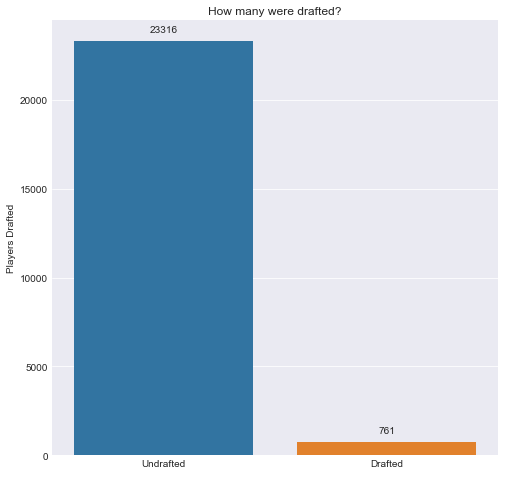

In [23]:
# Barplot of drafted vs undrafted players
plt.figure(figsize=(8,8))
ax = sns.countplot('target',data=df)
ax.set_xticklabels(['Undrafted','Drafted'])
ax.set_ylabel('Players Drafted')
ax.set_xlabel(' ')
ax.set_title('How many were drafted?')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 500,height ,ha="center");

Over 32,000 individual NCAA basketball players career statistics were collected from 317 difference institutions ranging from the years 2000 to 2018 via SportsReference. Due to the nature of the data, like most real world data, there is a heavy class imbalance. Out of the 32,000 students only 761 were able to make it to the NBA. Every year 60 players are drafted to the NBA, over the course of 18 years 1080 people are drafted. The data that was collected only included players in the NCAA so the other 319 drafted players are most likely from overseas.

In [13]:
# feature selection 

df = df[['player_id','name','team_abbreviation','points','total_rebounds','assists','blocks','field_goals','field_goal_attempts','free_throws','free_throw_attempts','games_played','games_started','minutes_played','personal_fouls','steals','three_pointers','two_pointers','weight','height','position','year','true_shooting_percentage','target']].copy()

In [14]:
# Export to CSV
df.to_csv('Data/NCAA_Stats')

In [15]:
df.head()

,player_id,name,team_abbreviation,points,total_rebounds,assists,blocks,field_goals,field_goal_attempts,free_throws,...,personal_fouls,steals,three_pointers,two_pointers,weight,height,position,year,true_shooting_percentage,target
0,ryan-teets-1,ryan teets,air-force,50.0,31.0,12.0,1.0,16.0,32.0,14.0,...,34.0,8.0,4.0,12.0,200.0,6-6,Forward,2007,0.564,0
2,anwar-johnson-1,anwar johnson,air-force,656.0,249.0,162.0,12.0,208.0,458.0,233.0,...,216.0,65.0,7.0,201.0,200.0,6-5,Guard,2009,0.524,0
3,eric-kenzik-1,eric kenzik,air-force,136.0,87.0,32.0,5.0,49.0,107.0,29.0,...,69.0,11.0,9.0,40.0,220.0,6-9,Forward,2008,0.532,0
5,selwyn-mansell-1,selwyn mansell,air-force,69.0,15.0,35.0,0.0,17.0,53.0,29.0,...,48.0,21.0,6.0,11.0,160.0,5-11,Guard,2002,0.479,0
8,kyle-broekhuis-1,kyle broekhuis,air-force,115.0,114.0,28.0,5.0,37.0,105.0,31.0,...,63.0,9.0,10.0,27.0,200.0,6-7,Forward,2017,0.453,0
